# Предсказание стоимости жилья

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Исследовательский анализ данных

In [80]:
train_df = pd.read_csv('train.csv')

In [81]:
train_df

,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
0,Lvl,2003.0,2,856,706,8,Gd,61,GasA,Norm,...,2,Gd,1,1710,854,Y,Gd,856,0,208500
1,Lvl,1976.0,2,1262,978,6,TA,0,GasA,Norm,...,2,TA,1,1262,0,Y,Gd,1262,1,181500
2,Lvl,2001.0,2,920,486,6,Gd,42,GasA,Norm,...,2,Gd,1,1786,866,Y,Gd,920,1,223500
3,Lvl,1998.0,1,961,216,7,TA,35,GasA,Norm,...,3,Gd,1,1717,756,Y,TA,756,1,140000
4,Lvl,2000.0,2,1145,655,9,Gd,84,GasA,Norm,...,3,Gd,1,2198,1053,Y,Gd,1145,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Lvl,1999.0,2,953,0,7,TA,40,GasA,Norm,...,2,TA,1,1647,694,Y,Gd,953,1,175000
1456,Lvl,1978.0,2,2073,790,7,TA,0,GasA,Norm,...,2,TA,1,2073,0,Y,Gd,1542,2,210000
1457,Lvl,1941.0,2,1188,275,9,Ex,60,GasA,Norm,...,1,Gd,1,2340,1152,Y,TA,1152,2,266500
1458,Lvl,1950.0,1,1078,49,5,TA,0,GasA,Norm,...,1,Gd,1,1078,0,Y,TA,1078,0,142125


Набор данных содержит следующие признаки:

* LandContour: контур земельного участка

* GarageYrBlt: год постройки гаража

* BsmtFullBath:оборудованные ванные комнаты в подвале

* 1stFlrSF: площадь первого этажа

* BsmtFinSF1: площадь типа 1

* TotRmsAbvGrd: общее количество комнат

* ExterQual: качество отделки дома

* OpenPorchSF: площадь открытой веранды

* Heating: тип отопления

* Condition2: близость к различным условиям

* TotalQual: качество материалов

* GarageCars: размер гаража по вместимости автомобиля

* KitchenQual: качество кухни

* GrLivArea: жилая площадь

* 2ndFlrSF: площадь второго этажа

* CentralAir: наличие центрального кондиционирования

* BsmtQual:  высота подвала

* TotalBsmtSF: общая площадь подвала

* Fireplaces: количество каминов

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1460 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   FullBath      1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   OpenPorchSF   1460 non-null   int64  
 8   Heating       1460 non-null   object 
 9   Condition2    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  GarageCars    1460 non-null   int64  
 12  KitchenQual   1460 non-null   object 
 13  KitchenAbvGr  1460 non-null   int64  
 14  GrLivArea     1460 non-null   int64  
 15  2ndFlrSF      1460 non-null   int64  
 16  CentralAir    1460 non-null   object 
 17  BsmtQual      1423 non-null   object 
 18  TotalBsmtSF   1460 non-null 

Есть пропущенные значения в ```GarageYrBlt``` и ```BsmtQual```;  ```LandContour```, ```ExterQual```, ```Heating```, ```Condition2```, ```KitchenQual```, ```CentralAir``` и ```BsmtQual``` содержат категориальные данные.

In [8]:
train_df['GarageYrBlt'].fillna(0, inplace=True)

Сразу заменим отсутствующие значения в годе постройки гаража на 0.

In [9]:
train_df.describe()

,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,OpenPorchSF,OverallQual,GarageCars,KitchenAbvGr,GrLivArea,2ndFlrSF,TotalBsmtSF,Fireplaces,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1868.739726,1.565068,1162.626712,443.639726,6.517808,46.660274,6.099315,1.767123,1.046575,1515.463699,346.992466,1057.429452,0.613014,180921.195890
std,453.697295,0.550916,386.587738,456.098091,1.625393,66.256028,1.382997,0.747315,0.220338,525.480383,436.528436,438.705324,0.644666,79442.502883
min,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1958.000000,1.000000,882.000000,0.000000,5.000000,0.000000,5.000000,1.000000,1.000000,1129.500000,0.000000,795.750000,0.000000,129975.000000
50%,1977.000000,2.000000,1087.000000,383.500000,6.000000,25.000000,6.000000,2.000000,1.000000,1464.000000,0.000000,991.500000,1.000000,163000.000000
75%,2001.000000,2.000000,1391.250000,712.250000,7.000000,68.000000,7.000000,2.000000,1.000000,1776.750000,728.000000,1298.250000,1.000000,214000.000000
max,2010.000000,3.000000,4692.000000,5644.000000,14.000000,547.000000,10.000000,4.000000,3.000000,5642.000000,2065.000000,6110.000000,3.000000,755000.000000


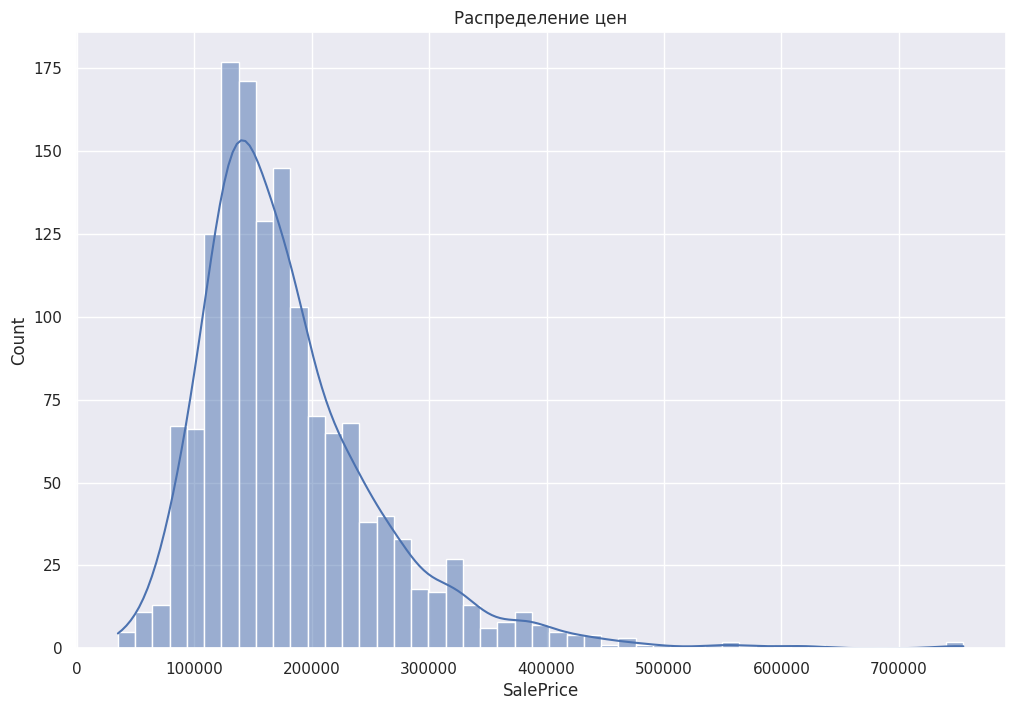

In [10]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(train_df['SalePrice'], kde=True).set_title('Распределение цен');

Большинство домов имеет цену от 100000 до 200000 долларов, смещение указывает на присутствие домов с очень высокими ценами.

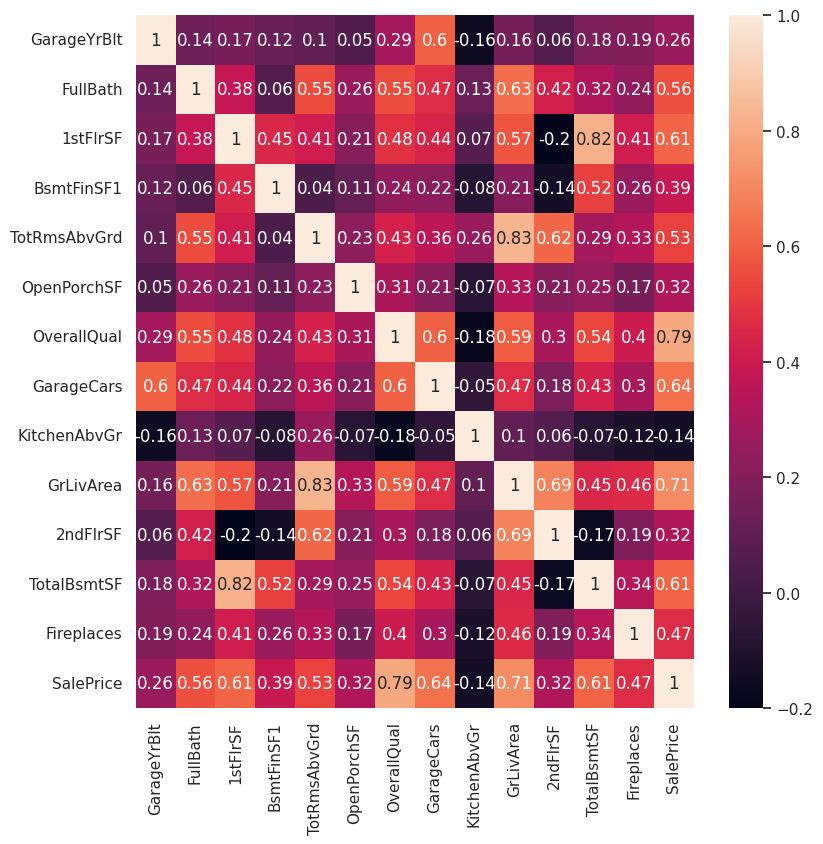

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(train_df.corr(numeric_only=True).round(2), annot=True);

Некоторые наблюдения:

* Наибольшая корреляция с ценой продажи наблюдается у общей оценки качества дома (```OverallQual```) и площадью жилого пространства (```GrLivArea```)

* Сильная корреляция между общей площадью подвала (```TotalBsmtSF```) и площадью первого этажа (```1stFlrSF```), что кажется логичным: в больших домах также большие подвалы.

* Год постройки гаража (```GarageYrBlt```) имеет слабую корреляцию с ценой.

## Подготовка данных

In [12]:
train_df.select_dtypes(include=['object']).columns

Index(['LandContour', 'ExterQual', 'Heating', 'Condition2', 'KitchenQual',
       'CentralAir', 'BsmtQual'],
      dtype='object')

В наборе есть 7 категориальных признаков, которые нужно преобразовать в числовые. Для ```ExterQual```, ```KitchenQual``` и ```BsmtQual```, в которых содержатся значения

- Ex    (Excellent)
- Gd	(Good)
- TA	(Average/Typical)
- Fa	(Fair)
- Po	(Poor)

кажется логичным заменить ```Ex``` на 5, ```Gd``` на 4, ```TA``` на 3 и т.д.

In [13]:
train_df['BsmtQual'].fillna('NaN', inplace=True)

In [14]:
value_mapping = {'Ex': 5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NaN': 0}

train_df['ExterQual'] = train_df['ExterQual'].map(value_mapping)
train_df['KitchenQual'] = train_df['KitchenQual'].map(value_mapping)
train_df['BsmtQual'] = train_df['BsmtQual'].map(value_mapping)

In [15]:
train_df['BsmtQual'].unique()

array([4, 3, 5, 0, 2])

В ```CentralAir```, по аналогии, заменим наличие центрального кондиционирования (```Y```) на 1, а отсутствие (```N```) - на 0.

In [16]:
value_mapping = {'Y':1, 'N': 0}
train_df['CentralAir'] = train_df['CentralAir'].map(value_mapping)

Остальные признаки преобразуем с помощью One-Hot Encoding.

In [17]:
train_df = pd.get_dummies(train_df, columns=["LandContour", "Heating", "Condition2"])

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GarageYrBlt        1460 non-null   float64
 1   FullBath           1460 non-null   int64  
 2   1stFlrSF           1460 non-null   int64  
 3   BsmtFinSF1         1460 non-null   int64  
 4   TotRmsAbvGrd       1460 non-null   int64  
 5   ExterQual          1460 non-null   int64  
 6   OpenPorchSF        1460 non-null   int64  
 7   OverallQual        1460 non-null   int64  
 8   GarageCars         1460 non-null   int64  
 9   KitchenQual        1460 non-null   int64  
 10  KitchenAbvGr       1460 non-null   int64  
 11  GrLivArea          1460 non-null   int64  
 12  2ndFlrSF           1460 non-null   int64  
 13  CentralAir         1460 non-null   int64  
 14  BsmtQual           1460 non-null   int64  
 15  TotalBsmtSF        1460 non-null   int64  
 16  Fireplaces         1460 

## Обучение

In [19]:
y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Признаки имеют разный масштаб, поэтому стандартизируем их.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Рассмотрим для начала модель линейной регрессии с регуляризациями Ridge и Lasso.

In [22]:
ridge_model = Ridge(max_iter=10000)
lasso_model = Lasso(max_iter=10000)

ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 500, 1000]}
lasso_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 500, 1000]}

In [23]:
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train_scaled, y_train)

best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_params = lasso_grid_search.best_params_
best_lasso_model = lasso_grid_search.best_estimator_

ridge_y_pred = best_ridge_model.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2_score = r2_score(y_test, ridge_y_pred)

lasso_y_pred = best_lasso_model.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lasso_r2_score = r2_score(y_test, lasso_y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_cv_rmse = np.sqrt(-cross_val_score(best_ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error'))
ridge_cv_r2_score = cross_val_score(best_ridge_model, X, y, cv=kf, scoring='r2')

lasso_cv_rmse = np.sqrt(-cross_val_score(best_lasso_model, X, y, cv=kf, scoring='neg_mean_squared_error'))
lasso_cv_r2_score = cross_val_score(best_lasso_model, X, y, cv=kf, scoring='r2')

print("Ridge:")
print("Best parameters:", best_ridge_params)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2_score)
print("RMSE Mean:", np.mean(ridge_cv_rmse))
print("R2 Score Mean:", np.mean(ridge_cv_r2_score))

print("\nLasso:")
print("Best parameters:", best_lasso_params)
print("RMSE:", lasso_rmse)
print("R2 Score:", lasso_r2_score)
print("RMSE Mean:", np.mean(lasso_cv_rmse))
print("R2 Score Mean:", np.mean(lasso_cv_r2_score))

Ridge:
Best parameters: {'alpha': 500}
RMSE: 35658.513949871
R2 Score: 0.8177826694976957
RMSE Mean: 37756.467317545736
R2 Score Mean: 0.7466992846243778

Lasso:
Best parameters: {'alpha': 1000}
RMSE: 34127.4622204794
R2 Score: 0.8330942922937348
RMSE Mean: 37054.2254976166
R2 Score Mean: 0.7584892949803443


Модель Lasso показывает лучшие результаты как на тестовых данных, так и по средним значениям кросс-валидации: более низкий RMSE и более высокое значение R². У обоих моделей предсказанная цена отличается от настоящей в среднем на 37 тысяч.

In [24]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
cat_model = CatBoostRegressor(random_state=42)

Теперь рассмотрим ансамблевые методы (случайный лес, XGBoost, CatBoost).

In [25]:
rf_param_grid = {'n_estimators': [50, 100, 200, 300, 500],
                 'max_depth': [None, 5, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}
xgb_param_grid = {'n_estimators': [50, 100, 200, 300, 500],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.3]}
cat_param_grid = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}

Для каждой модели подберем лучшие гиперпараметры с помощью ```GridSearchCV```

In [ ]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cat_grid_search.fit(X_train, y_train)

In [27]:
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

best_xgb_params = xgb_grid_search.best_params_
best_xgb_model = xgb_grid_search.best_estimator_

best_cat_params = cat_grid_search.best_params_
best_cat_model = cat_grid_search.best_estimator_

In [28]:
rf_y_pred = best_rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2_score = r2_score(y_test, rf_y_pred)

xgb_y_pred = best_xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_r2_score = r2_score(y_test, xgb_y_pred)

cat_y_pred = best_cat_model.predict(X_test)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_y_pred))
cat_r2_score = r2_score(y_test, cat_y_pred)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_rmse = np.sqrt(-cross_val_score(best_rf_model, X, y, cv=kf, scoring='neg_mean_squared_error'))
rf_cv_r2_score = cross_val_score(best_rf_model, X, y, cv=kf, scoring='r2')

xgb_cv_rmse = np.sqrt(-cross_val_score(best_xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error'))
xgb_cv_r2_score = cross_val_score(best_xgb_model, X, y, cv=kf, scoring='r2')

cat_cv_rmse = np.sqrt(-cross_val_score(best_cat_model, X, y, cv=kf, scoring='neg_mean_squared_error'))
cat_cv_r2_score = cross_val_score(best_cat_model, X, y, cv=kf, scoring='r2')

In [85]:
print("Random Forest:")
print("Best parameters:", best_rf_params)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2_score)
print("RMSE Mean:", np.mean(rf_cv_rmse))
print("R2 Score Mean:", np.mean(rf_cv_r2_score))

print("\nXGBoost:")
print("Best parameters:", best_xgb_params)
print("RMSE:", xgb_rmse)
print("R2 Score:", xgb_r2_score)
print("RMSE Mean:", np.mean(xgb_cv_rmse))
print("R2 Score Mean:", np.mean(xgb_cv_r2_score))

print("\nCatBoost:")
print("Best parameters:", best_cat_params)
print("RMSE:", cat_rmse)
print("R2 Score:", cat_r2_score)
print("RMSE Mean:", np.mean(cat_cv_rmse))
print("R2 Score Mean:", np.mean(cat_cv_r2_score))

Random Forest:
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 27173.555977131276
R2 Score: 0.8941828284716409
RMSE Mean: 30729.83393397126
R2 Score Mean: 0.8346440362467483

XGBoost:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
RMSE: 27370.318198497996
R2 Score: 0.892644847726123
RMSE Mean: 30235.981869073126
R2 Score Mean: 0.8311589474521449

CatBoost:
Best parameters: {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
RMSE: 25122.138756086093
R2 Score: 0.909556695954299
RMSE Mean: 28583.95231346144
R2 Score Mean: 0.8635759333440088


```Random Forest``` и ```XGBoost``` показывают схожие результаты на тестовых данных и средних значениях кросс-валидации, лучшие результаты у ```CatBoost```: наименьший RMSE и наивысший R².

In [31]:
results_dict = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost", "CatBoost"],
    "RMSE": [ridge_rmse, lasso_rmse, rf_rmse, xgb_rmse, cat_rmse],
    "R2 Score": [ridge_r2_score, lasso_r2_score, rf_r2_score, xgb_r2_score, cat_r2_score],
    "RMSE Mean": [np.mean(ridge_cv_rmse), np.mean(lasso_cv_rmse), np.mean(rf_cv_rmse), np.mean(xgb_cv_rmse), np.mean(cat_cv_rmse)],
    "R2 Score Mean": [np.mean(ridge_cv_r2_score), np.mean(lasso_cv_r2_score), np.mean(rf_cv_r2_score), np.mean(xgb_cv_r2_score), np.mean(cat_cv_r2_score)]
}

results_df = pd.DataFrame(results_dict)

results_df.round(3)

,Model,RMSE,R2 Score,RMSE Mean,R2 Score Mean
0,Ridge Regression,35658.514,0.818,37756.467,0.747
1,Lasso Regression,34127.462,0.833,37054.225,0.758
2,Random Forest,27173.556,0.894,30729.834,0.835
3,XGBoost,27370.318,0.893,30235.982,0.831
4,CatBoost,25122.139,0.910,28583.952,0.864


Лучший результат по всем параметрам у ```CatBoost```, в среднем предсказанная цена отличается от настоящей на 28 тысяч. Используем теперь эту модель для предсказания цены продажи для данных из test.csv.

## Предсказание на тестовых данных

In [59]:
test_df = pd.read_csv('test.csv')

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1459 non-null   object 
 1   GarageYrBlt   1381 non-null   float64
 2   FullBath      1459 non-null   int64  
 3   1stFlrSF      1459 non-null   int64  
 4   BsmtFinSF1    1458 non-null   float64
 5   TotRmsAbvGrd  1459 non-null   int64  
 6   ExterQual     1459 non-null   object 
 7   OpenPorchSF   1459 non-null   int64  
 8   Heating       1459 non-null   object 
 9   Condition2    1459 non-null   object 
 10  OverallQual   1459 non-null   int64  
 11  GarageCars    1458 non-null   float64
 12  KitchenQual   1458 non-null   object 
 13  KitchenAbvGr  1459 non-null   int64  
 14  GrLivArea     1459 non-null   int64  
 15  2ndFlrSF      1459 non-null   int64  
 16  CentralAir    1459 non-null   object 
 17  BsmtQual      1415 non-null   object 
 18  TotalBsmtSF   1458 non-null 

In [60]:
test_df['GarageYrBlt'].fillna(0, inplace=True)

Все признаки приведем в соответствие с тренировочными данными.

In [61]:
test_df['BsmtQual'].fillna('NaN', inplace=True)
test_df['KitchenQual'].fillna('NaN', inplace=True)

value_mapping = {'Ex': 5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NaN': 0}

test_df['ExterQual'] = test_df['ExterQual'].map(value_mapping)
test_df['KitchenQual'] = test_df['KitchenQual'].map(value_mapping)
test_df['BsmtQual'] = test_df['BsmtQual'].map(value_mapping)

value_mapping = {'Y':1, 'N': 0}
test_df['CentralAir'] = test_df['CentralAir'].map(value_mapping)
test_df = pd.get_dummies(test_df, columns=["LandContour", "Heating", "Condition2"])

In [62]:
test_df['Heating_Floor'] = 0
test_df['Heating_OthW'] = 0
test_df['Condition2_RRAe'] = 0
test_df['Condition2_RRAn'] = 0
test_df['Condition2_RRNn'] = 0

In [70]:
prediction = best_cat_model.predict(test_df)
prediction

array([120794.05639332, 150811.5931658 , 182083.28951661, ...,
       154075.6664562 , 112056.33227374, 224672.66893853])

In [84]:
submission = pd.DataFrame()
submission['Id'] = range(train_df.shape[0] + 1, train_df.shape[0] + 1 + len(prediction))
submission.set_index('Id', inplace=True)
submission['SalePrice'] = prediction
submission.head()

,SalePrice
Id,
1461,120794.056393
1462,150811.593166
1463,182083.289517
1464,173156.060791
1465,194678.721595


In [78]:
submission.to_csv('submission.csv')